# **Insurance_dataset**

#Step 1 - Data Cleaning and Preparation

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data into pandas DataFrame
insurance_data = pd.read_csv('/content/insurance_dataset.csv')

#Display the first few rows of the datasets
insurance_data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.30767
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.89922
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.47630
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.02984
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.30984


In [3]:
#Display the shape of data set: insurance_data
insurance_data.shape

(1000000, 12)

In [4]:
#Describe the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372377
50%,41.000000,34.000000,2.000000,16622.127975
75%,53.000000,41.990000,4.000000,19781.465407
max,65.000000,50.000000,5.000000,32561.560370


In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [6]:
insurance_data.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
medical_history,250762
family_medical_history,250404
exercise_frequency,0
occupation,0


#Step 2: Preprocessing the Data

In [7]:
#Normalize numerical features
from sklearn.preprocessing import StandardScaler

#Fill missing values in 'medical_history' and 'family_medical_history'
insurance_data['medical_history'] = insurance_data['medical_history'].fillna('No value')
insurance_data['family_medical_history'] = insurance_data['family_medical_history'].fillna('No Value')

# Rename columns for clarity
insurance_data.rename(columns={'medical_history':'indv_medical_hist'}, inplace=True)

#Display the dataset after handling missing values
insurance_data.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372377
50%,41.000000,34.000000,2.000000,16622.127975
75%,53.000000,41.990000,4.000000,19781.465407
max,65.000000,50.000000,5.000000,32561.560370


In [8]:
#Sample the data
seed = 101

In [9]:
df = insurance_data.sample(n=2000, random_state=seed)

In [10]:
insurance_data.head()

,age,gender,bmi,children,smoker,region,indv_medical_hist,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,No Value,Never,Blue collar,Premium,20460.30767
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.89922
2,38,male,44.88,2,yes,southwest,No value,High blood pressure,Occasionally,Blue collar,Premium,20204.47630
3,25,male,19.89,0,no,northwest,No value,Diabetes,Rarely,White collar,Standard,11789.02984
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.30984


In [11]:
#Identify numerical features
numerical_features = insurance_data.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical features:", numerical_features)

Numerical features: ['age', 'bmi', 'children', 'charges']


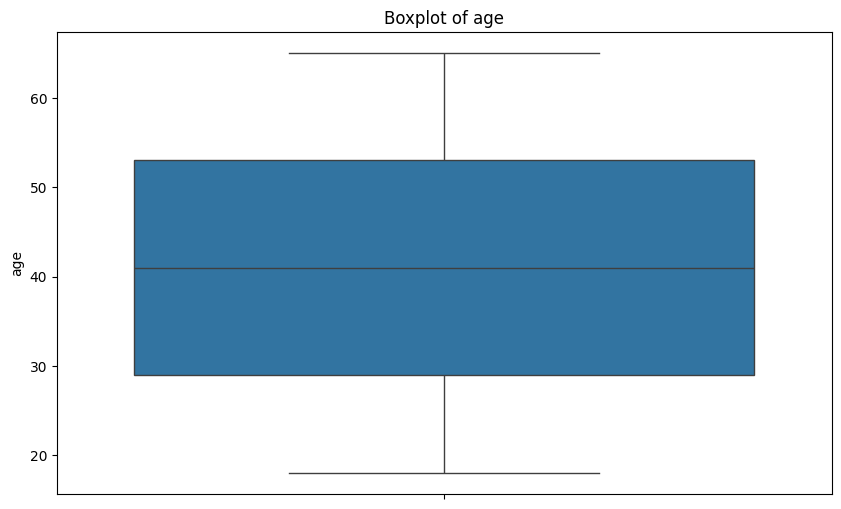

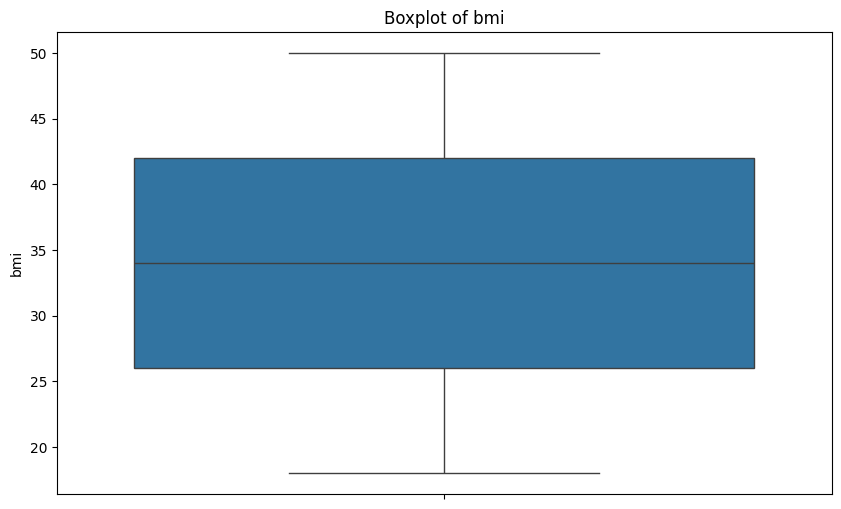

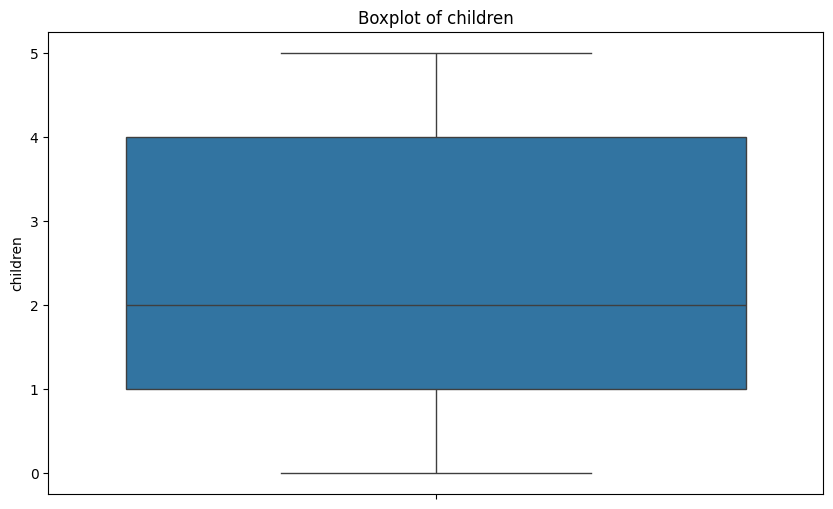

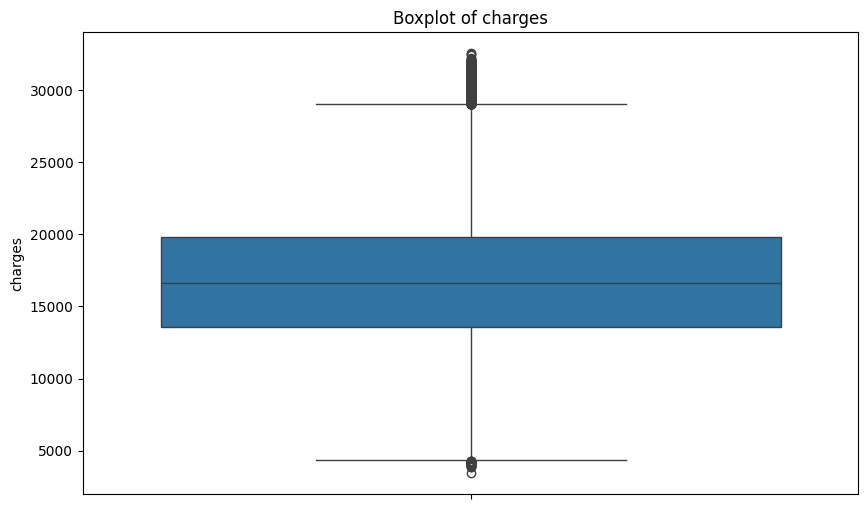

In [12]:
#Descriptive Analysis - Visualize Outliers for Each Numerical Feature
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=insurance_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

#Step 3: Pre-Processing (Basic / Advanced)

In [13]:
!pip install scikit-learn

In [14]:
#Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
class preprocessor:
    def classifire(df,numeric):
        for col in df.columns:
            if col in numeric:
                df[col] = df[col].astype('float64')
                continue
            df[col] = df[col].astype('category')
        return df

    def encoder(df,exclude,thresh):
        Encoding_targets = df.select_dtypes(exclude=(int,float))
        Enc_target_freq = Encoding_targets.nunique()
        for col in Enc_target_freq.index:
            if col==exclude:
                continue
            if col in Enc_target_freq[Enc_target_freq<=thresh].index:
                print("\033[1mOne-Hot Encoding on features: \033[0m",col)
                df = pd.concat((df,pd.get_dummies(df[col],prefix=col.split('_')[0],drop_first=True,dtype=int)),axis=1)
                df.drop(columns=col,inplace=True)
                continue
            print("\033[1mLabel Encoding on features: \033[0m",col)
            df[f'enc_{col}'] = LabelEncoder().fit_transform(df[col])
            df.drop(columns=col,inplace=True)
        return df

In [15]:
insurance_data.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'indv_medical_hist', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')

In [16]:
#Classify categorical and numerical columns
df = preprocessor.classifire(df, ('age', 'bmi', 'charges')) #Use lowercase 'p' for preprocessor
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 180580 to 135588
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     2000 non-null   float64 
 1   gender                  2000 non-null   category
 2   bmi                     2000 non-null   float64 
 3   children                2000 non-null   category
 4   smoker                  2000 non-null   category
 5   region                  2000 non-null   category
 6   indv_medical_hist       2000 non-null   category
 7   family_medical_history  2000 non-null   category
 8   exercise_frequency      2000 non-null   category
 9   occupation              2000 non-null   category
 10  coverage_level          2000 non-null   category
 11  charges                 2000 non-null   float64 
dtypes: category(9), float64(3)
memory usage: 81.7 KB


In [17]:
#Encode categorical features
df = preprocessor.encoder(df, exclude='charges', thresh=4) #Use lowercase 'p' to match the class name
df.head()

One-Hot Encoding on features:  gender
Label Encoding on features:  children
One-Hot Encoding on features:  smoker
One-Hot Encoding on features:  region
One-Hot Encoding on features:  indv_medical_hist
One-Hot Encoding on features:  family_medical_history
One-Hot Encoding on features:  exercise_frequency
One-Hot Encoding on features:  occupation
One-Hot Encoding on features:  coverage_level


,age,bmi,charges,gender_male,enc_children,smoker_yes,region_northwest,region_southeast,region_southwest,indv_Heart disease,...,family_High blood pressure,family_No Value,exercise_Never,exercise_Occasionally,exercise_Rarely,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_Premium,coverage_Standard
180580,23.0,24.80,22055.75606,1,5,1,1,0,0,1,...,0,1,0,0,1,1,0,0,1,0
209773,41.0,49.49,16421.52007,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
820631,36.0,44.00,22794.50307,1,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
886397,25.0,35.95,13825.79082,1,4,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
672192,61.0,41.76,18391.48447,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [18]:
df.columns

Index(['age', 'bmi', 'charges', 'gender_male', 'enc_children', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'indv_Heart disease', 'indv_High blood pressure', 'indv_No value',
       'family_Heart disease', 'family_High blood pressure', 'family_No Value',
       'exercise_Never', 'exercise_Occasionally', 'exercise_Rarely',
       'occupation_Student', 'occupation_Unemployed',
       'occupation_White collar', 'coverage_Premium', 'coverage_Standard'],
      dtype='object')

#Step 4: Feature Engineering / Vectorization

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer # Import discretizer
from sklearn.preprocessing import StandardScaler
import pickle
import tensorflow as tf

def feature_engineering(df):
    X = df.drop(columns=['charges'])
    y = df['charges']
    return X, y

X, y = feature_engineering(df)

In [20]:
def split_and_scale_data(X, y, seed):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

In [21]:
X_train_scaled, X_test_scaled, y_train, y_test, scaler = split_and_scale_data(X, y, seed=101)

In [22]:
def train_linear_model(X_train, y_train):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    return lin_reg

In [23]:
lin_reg = train_linear_model(X_train_scaled, y_train)

In [24]:
def hyperparameter_tuning(X_train, y_train):
    parameters = {
        'penalty': ['l2'],
        'C': np.logspace(-3, 3, 7),
        'solver': ['newton-cg', 'liblinear', 'lbfgs']
    }
    logreg = LogisticRegression()
    grid = GridSearchCV(logreg, parameters, cv=10)
    discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
    y_train_discrete = discretizer.fit_transform(y_train.values.reshape(-1, 1))
    grid.fit(X_train, y_train_discrete)
    print("Best Parameters:", grid.best_params_)
    print("Best Score:", grid.best_score_)
    return grid

In [25]:
grid = hyperparameter_tuning(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

Best Parameters: {'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.9650000000000001


#Step 5: Evaluate the Model

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2)

In [27]:
evaluate_model(lin_reg, X_test_scaled, y_test)

Mean Squared Error: 80424.82836648793
Mean Absolute Error: 243.08088607395365
R2 Score: 0.9958712085061914


In [28]:
#Save the trained model
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [29]:
save_model(lin_reg, 'modelForPrediction.pkl')
save_model(scaler, 'StandardScaler.pkl')

#Step 6: Evaluation (Intrinsic / Extrinsic)

In [30]:
!pip install tensorflow
import tensorflow as tf

In [31]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
#Prepare input features for neural network
def create_nn_model(input_shape):
    input_num = Input(shape=(input_shape,))
    x = Dense(128, activation='relu')(input_num)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(1)(x)
    model = Model(inputs=input_num, outputs=output)
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [32]:
numerical_features = df.drop(columns=['charges'])
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(numerical_features, df['charges'], test_size=0.2, random_state=101)
nn_model = create_nn_model(numerical_features.shape[1])

In [33]:
def train_nn_model(model, X_train, y_train):
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
    return history

In [34]:
history = train_nn_model(nn_model, X_train_nn, y_train_nn)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 299474720.0000 - mae: 16738.1543 - val_loss: 302454464.0000 - val_mae: 16830.3535
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 288133760.0000 - mae: 16397.4590 - val_loss: 288365760.0000 - val_mae: 16408.7695
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 279618944.0000 - mae: 16123.3916 - val_loss: 248187936.0000 - val_mae: 15139.7988
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 231557120.0000 - mae: 14488.0879 - val_loss: 174674336.0000 - val_mae: 12473.4629
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 146646288.0000 - mae: 11199.1455 - val_loss: 90369240.0000 - val_mae: 8452.8145
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 75018712.0000 - mae: 7440.4512 - val_loss: 39380772.0000 - val_mae: 5191.1157
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 36121468.0000 - mae: 4878.2485 - val_loss: 27743968.0000 - val_mae: 4254.1650
Epoch 8/50
40/40 ━━━━━━━━

In [35]:
def evaluate_nn_model(model, X_test, y_test):
    loss, mae = model.evaluate(X_test, y_test)
    print(f"Mean Absolute Error: {mae}")

evaluate_nn_model(nn_model, X_test_nn, y_test_nn)
nn_model.save('insurance_model.h5')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16241008.0000 - mae: 3270.0349  


Mean Absolute Error: 3209.0224609375


In [36]:
!pip install streamlit pandas numpy matplotlib tensorflow scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [37]:
# Save feature names
feature_names = list(X.columns)
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(feature_names, file)

In [ ]:
#Save the model
#model.save('insurance_model.h5')

In [38]:
!pip install streamlit

In [39]:
# Install Required Packages
!pip install streamlit pandas numpy matplotlib tensorflow transformers

In [40]:
!npm install localtunnel


added 22 packages, and audited 23 packages in 3s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [41]:
!streamlit run /content/app.py &>/content/logs.txt &

In [42]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.171.205.112


In [43]:
!npx localtunnel --port 8501

your url is: https://thirty-kings-slide.loca.lt
^C
